In [1]:
import pandas as pd
import numpy as np

In [2]:

filepath="/content/housing.csv"
filepath

'/content/housing.csv'

In [3]:
df=pd.read_csv(filepath)

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### Summary of each Numerical Attribute

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

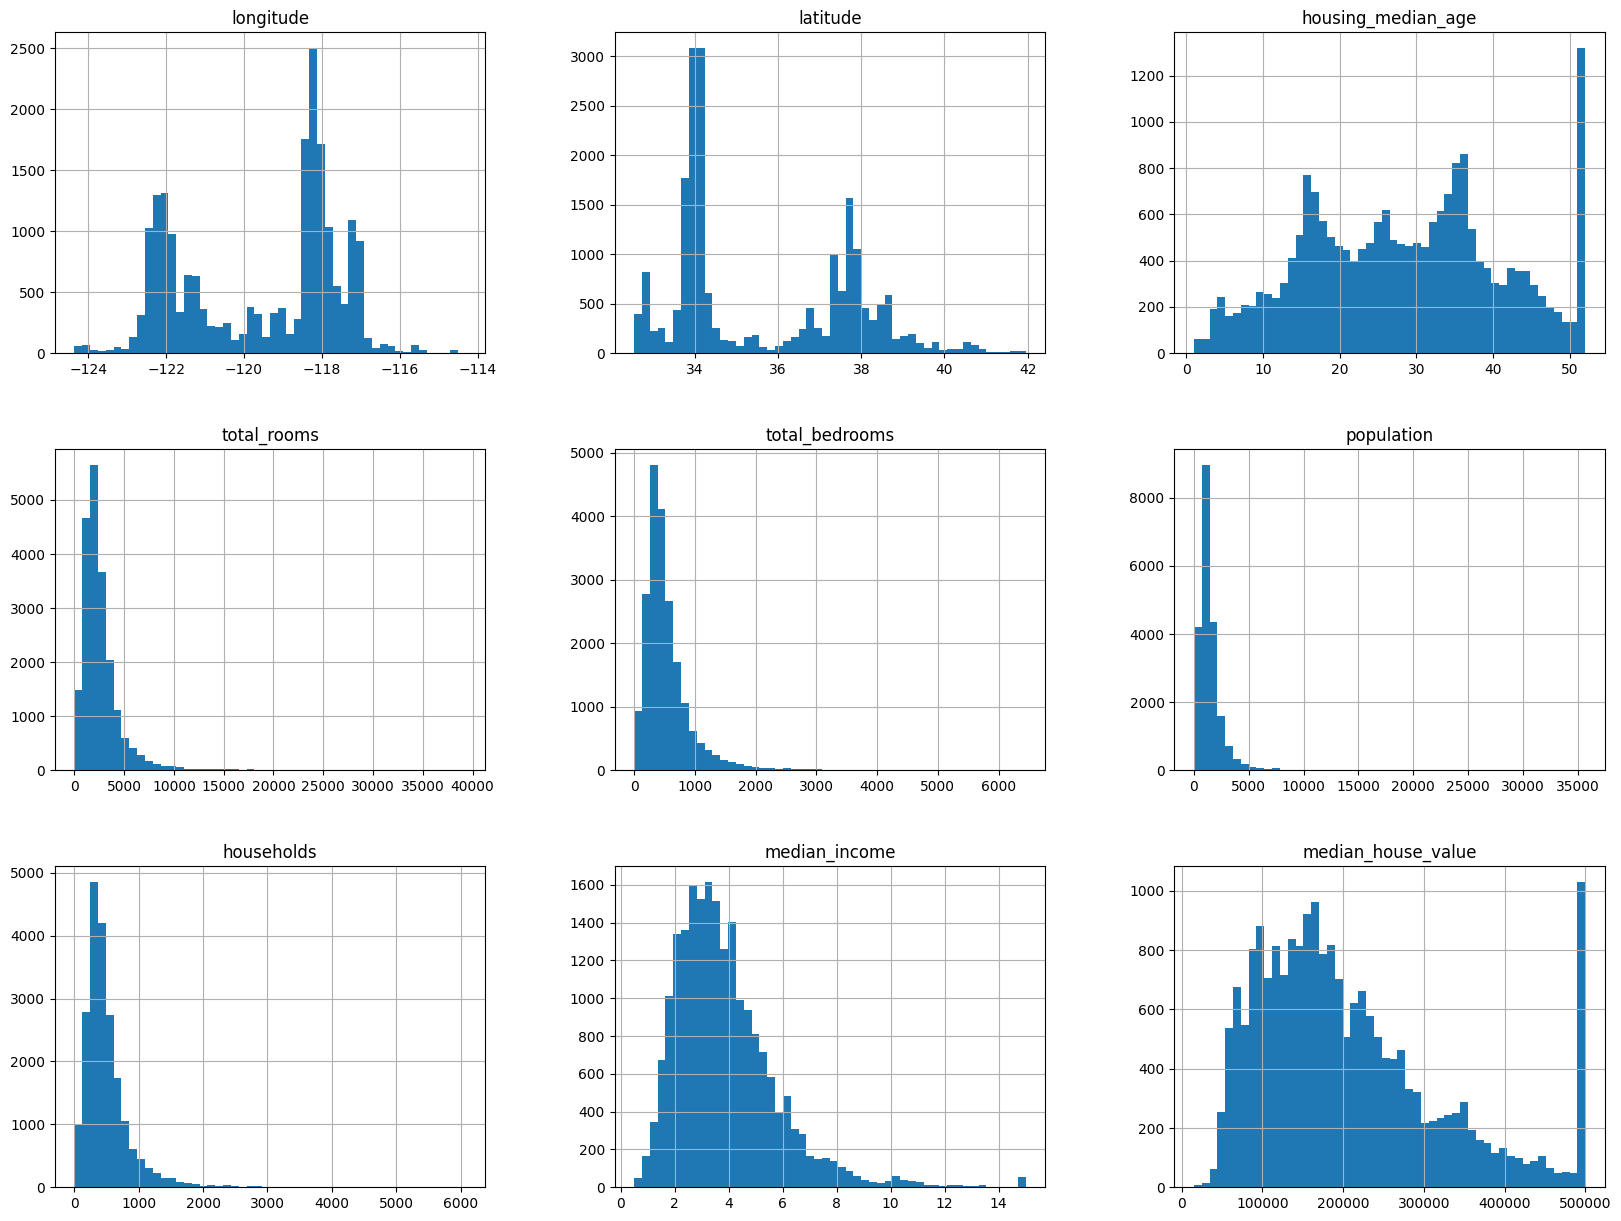

In [9]:
df.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: >

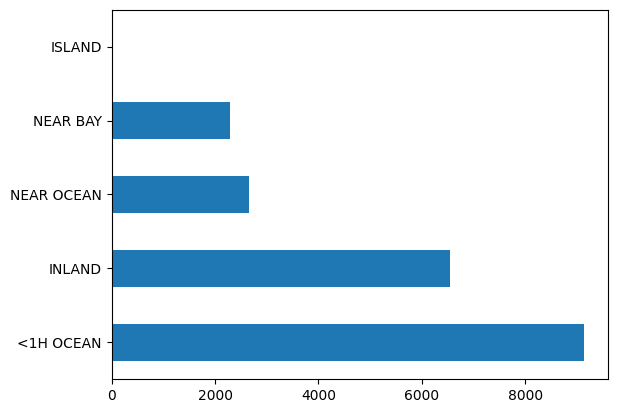

In [10]:
df['ocean_proximity'].value_counts().plot(kind="barh")

## Create the Test Set

### Function to split the data into training and testing data

In [11]:
def split_train_test(data, test_ratio):
     shuffled_indices = np.random.permutation(len(data))
     test_set_size = int(len(data) * test_ratio)
     test_indices = shuffled_indices[:test_set_size]
     train_indices = shuffled_indices[test_set_size:]
     return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
train_set_fun, test_set_fun = split_train_test(df, 0.2)

In [13]:
len(train_set_fun),len(test_set_fun)

(16512, 4128)

In [14]:
housing_with_id = df.reset_index() # adds an `index` column

In [15]:
from zlib import crc32
def test_set_check(identifier, test_ratio):
     return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

In [16]:
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [17]:
housing_with_id["id"] = df["longitude"] * 1000 + df["latitude"]
train_set_fun, test_set_fun = split_train_test_by_id(housing_with_id, 0.2, "id")

In [18]:
len(train_set_fun),len(test_set_fun)

(16322, 4318)

### Using sklearn

In [19]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [20]:
df["income_cat"] = pd.cut(df["median_income"],
 bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
 labels=[1, 2, 3, 4, 5])

<Axes: >

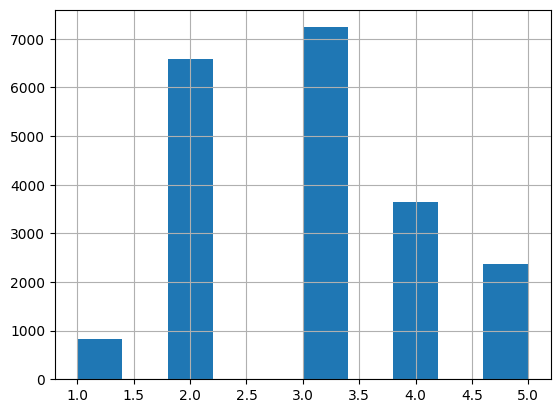

In [21]:
df["income_cat"].hist()

### Using sklearn stratifiedShufflesplit

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

In [23]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [24]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [28]:
df=strat_train_set

## Discover and visualize the to discover insights

### visualizing the geographical Data

<Axes: xlabel='longitude', ylabel='latitude'>

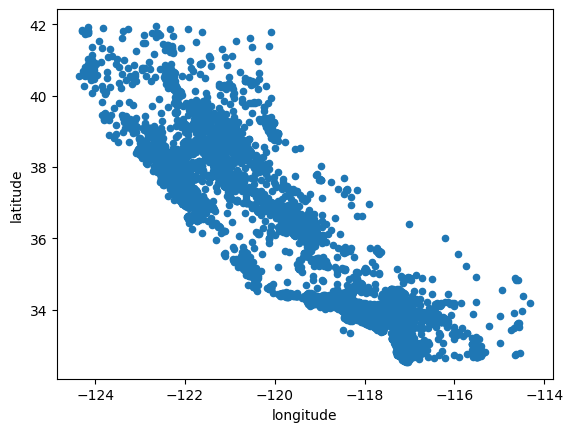

In [29]:
df.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

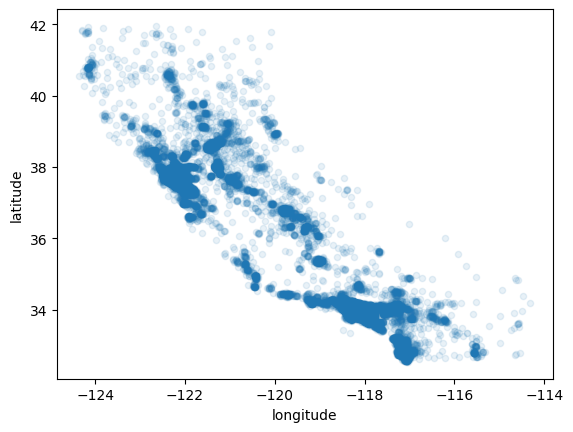

In [30]:
df.plot(kind="scatter", x="longitude", y="latitude",alpha=0.1)

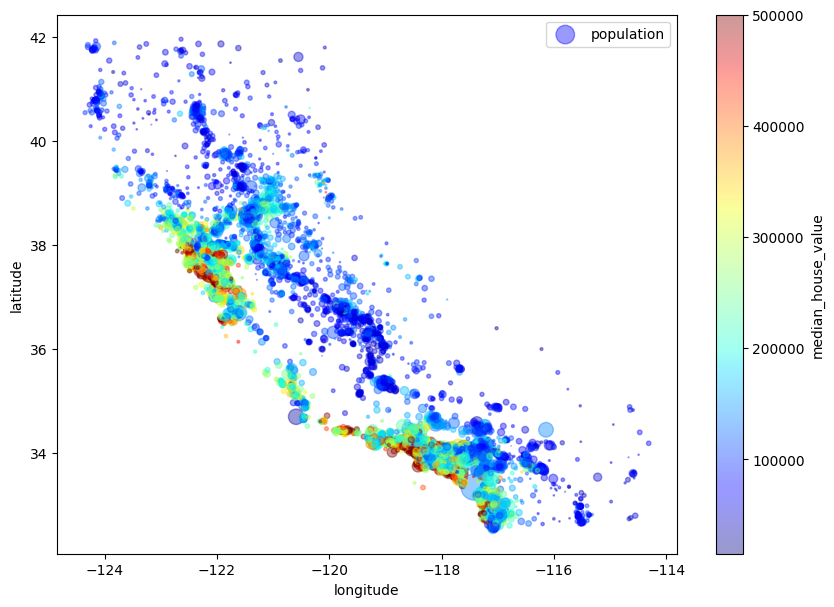

In [31]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=df["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()


## Looking for Correlation
- Since we are facing a regression problem correlation between columns with the target variable variable is very much useful

In [32]:
corr_matrix = df.corr()

<ipython-input-32-b69b4b6a6184>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [33]:
housing=df

In [34]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

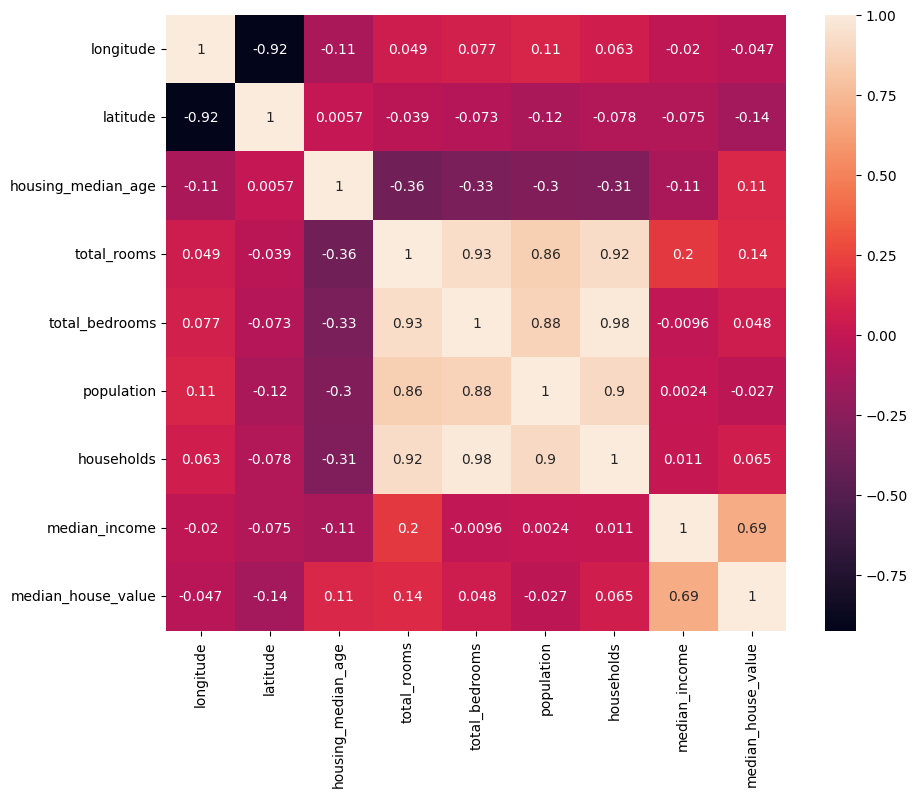

In [35]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,annot=True)
plt.show()

From the correlation matrix we can say that the median income is one of the important factor

<Axes: xlabel='median_income', ylabel='median_house_value'>

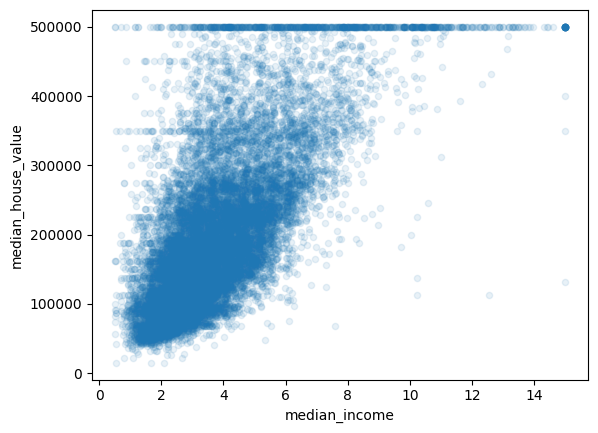

In [36]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
 alpha=0.1)

## Exploring univariate analysis of all numerical attributes

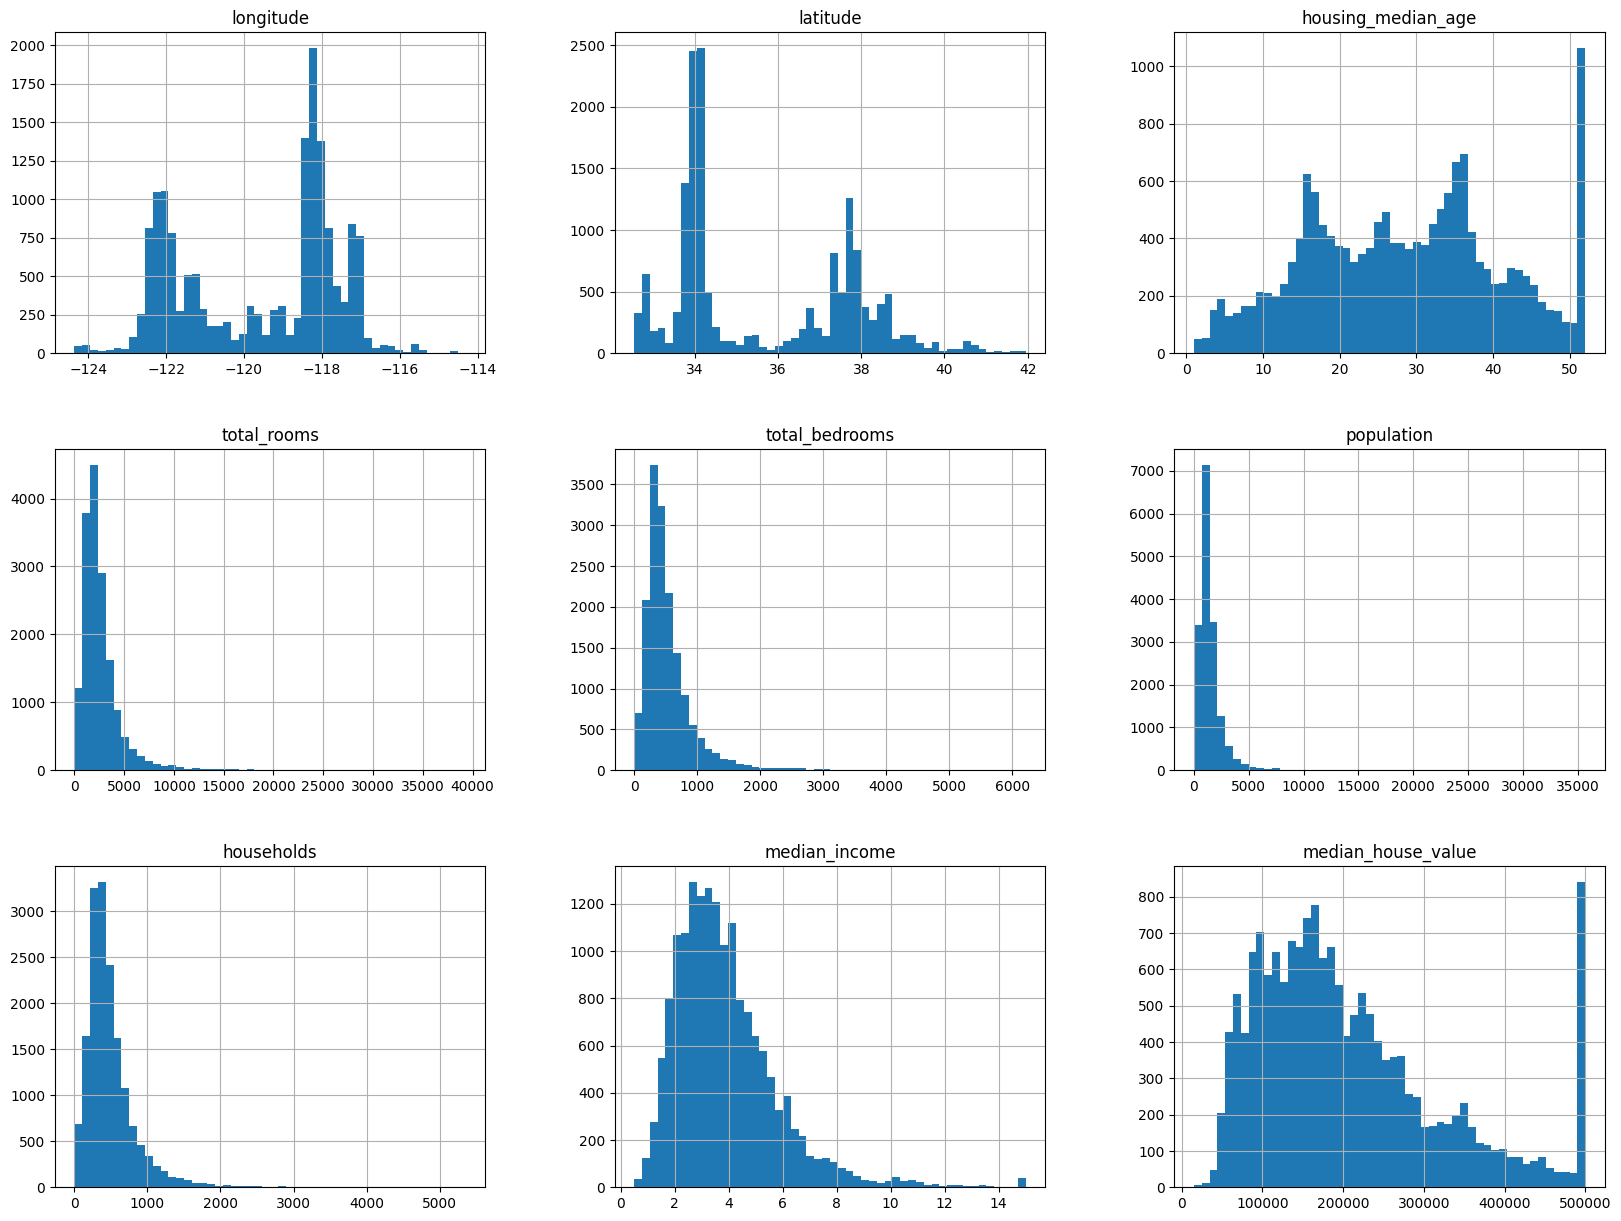

In [37]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

## Categorical Attributes
since we have only categorial attribute

<Axes: >

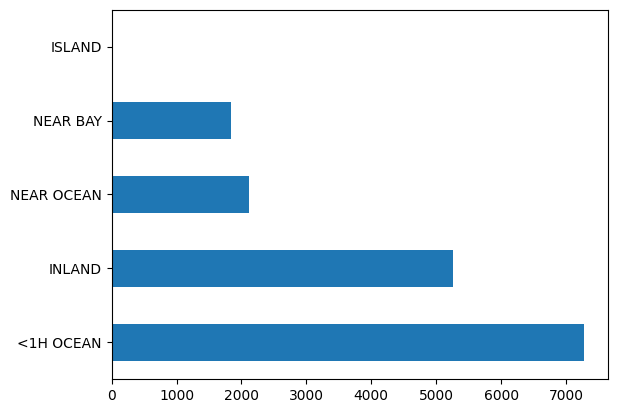

In [38]:
housing['ocean_proximity'].value_counts().plot(kind="barh")

# Prepare dataset for Machine Learning Algorithms

In [39]:
X = housing.drop('median_house_value',axis=1)
y = housing["median_house_value"].copy()

In [40]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,3


In [41]:
y.head()

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64

## Data Cleaning
- We need to do Data cleaning because most machine learning models won't work with missing values in features.

In [42]:
X.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
income_cat              0
dtype: int64

We can observe the null values in total_bedrooms column
### Ways to deal with null values
- if null values are more than half get rid of that column
- Try to remove the rows
- Try to impute or fill them with appropriate values

In [43]:
# housing.dropna(subset=["total_bedrooms"]) # option 1
# housing.drop("total_bedrooms", axis=1) # option 2
median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

### Filling Null values with sklearn
Scikit-Learn provides a handy class to take care of missing values: SimpleImputer.

In [44]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
# since it is numerical variable we are using strategy median
# if it is categorical we can use the strategy as mode.

In [109]:
housing_num = housing.drop(columns=["ocean_proximity","median_house_value"], axis=1)
# since we choose strategy for numerical values, so we are droppin the ocean_proximity as it object dtype

In [110]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [111]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155,    3.     ])

In [112]:
housing_num.median().values

<ipython-input-112-8050cbb6f664>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing_num.median().values


array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

we you can use this “trained” imputer to transform the training dataset by replacing the missing values with calculated median

In [113]:
temp=imputer.transform(housing_num)
housing_tr = pd.DataFrame(temp, columns=housing_num.columns)
#Imputers generally return numpy arrays we need to convert them back into dataframe

## Handling text and Categorical attributes¶

In [114]:
housing_cat=housing[['ocean_proximity']].copy()
housing_cat.head()

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


Most machine learning algorithms work on numerical input so we need to convert this text into numbers.
The process to tackle this situation is called encoding
### Methods for encoding
- Ordianl Encoding
- One hot encdoing
- Label Encoding

In [115]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [116]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[1.],
       [4.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

It is a list containing a 1D array of categories for each categorical attribute

In [117]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Note:
One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values. It may be good for example like good average bad. But here the labels or categories are not similar like they are different values like Yes or No!, in this type of situations the preferable encoding technique will be One Hot Encoding

In [118]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

Basically what it does is it will create new columns of number of categories in that column such that if it belong tp that particult categroy it will mae 1(hot) remaining columns will be 0(cold).

In [119]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [120]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# Transformers and Pipeline making

### Custom Transformer
Let's start with building our custom transformer

In [121]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

In [122]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
             bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [123]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

**Feature Scaling**


---
This is another important task in transformation we need to scale the values
There are two common ways to get all attributes to have the same scale: min-max scaling and standardization

In [124]:
from sklearn.preprocessing import StandardScaler # For scaling
from sklearn.impute import SimpleImputer # For filling null values
from sklearn.preprocessing import OneHotEncoder # To Handle categorical variables

### Transformation Piplelines
#### Numerical Column Pipeline

In [125]:
from sklearn.pipeline import Pipeline

num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('attrib_adder',CombinedAttributesAdder()),
    ('scaler',StandardScaler())

])

In [126]:
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,3


In [127]:
num_pipeline.fit(housing_num)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('attrib_adder', CombinedAttributesAdder()),
                ('scaler', StandardScaler())])

#### Column Transformer

In [128]:
from sklearn.compose import ColumnTransformer

In [129]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

In [130]:
num_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'income_cat']

In [131]:
cat_attribs

['ocean_proximity']

In [132]:
full_pipeline=ColumnTransformer([
    ("num",num_pipeline,num_attribs),
    ("cat",OneHotEncoder(),cat_attribs)
])

In [133]:
X_train=housing.drop('median_house_value',axis=1)

In [134]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,3


In [135]:
housing_prepared=full_pipeline.fit_transform(X_train)

Now we have prepared our dataset to feed machine learning algorithm
# ML Modelling

In [137]:
housing_labels = housing["median_house_value"].copy()

## Select and Train a model

In [138]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [139]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 83811.08312039 314388.27147935 145641.85902864 183704.64921202
 238729.66725745]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [140]:
from sklearn.metrics import mean_squared_error
house_predictions=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_labels,house_predictions)
np.sqrt(lin_mse)

68376.51254853733

In [141]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor()

In [142]:
tree_house_predictions=tree_reg.predict(housing_prepared)
tree_mse=mean_squared_error(housing_labels,tree_house_predictions)
np.sqrt(tree_mse)

0.0

Here rmse is too low that is zero (0) that means the model overfit the data

## Better Evaluation Using cross validation score

In [143]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores=np.sqrt(-scores)

In [144]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [145]:
display_scores(tree_rmse_scores)

Scores: [72595.0496409  71380.6220833  69749.71476064 72143.20948241
 69064.02177847 78217.56914072 69894.0606397  73503.44503172
 68126.9093379  70912.86218863]
Mean: 71558.74640844073
Standard deviation: 2720.8660378631616


In [146]:
lin_scores=cross_val_score(lin_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores=np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71523.78333874 64044.46774989 67454.97869698 68514.10137273
 66303.62531226 72166.63405138 74464.08841381 68570.11804395
 66063.64175868 69870.86192291]
Mean: 68897.63006613276
Standard deviation: 3002.746127534861


In [147]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)

RandomForestRegressor()

In [148]:
forest_predictions=forest_reg.predict(housing_prepared)
forest_rmse=mean_squared_error(forest_predictions,housing_labels)
np.sqrt(forest_rmse)

18747.110771178166

In [149]:
forest_scores=cross_val_score(forest_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores=np.sqrt(-forest_scores)

In [150]:
display_scores(forest_rmse)

Scores: 351454162.26682436
Mean: 351454162.26682436
Standard deviation: 0.0


# Fine Tune Model
## Gridsearch

In [151]:
from sklearn.model_selection import GridSearchCV

param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]


In [152]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)


In [153]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [154]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [155]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [156]:
feature_importances=grid_search.best_estimator_.feature_importances_
feature_importances

array([6.88973231e-02, 6.22856847e-02, 4.48431783e-02, 1.77207481e-02,
       1.77659647e-02, 1.79875806e-02, 1.73899120e-02, 2.68108016e-01,
       1.20811452e-01, 4.40197704e-02, 1.04518953e-01, 6.22295187e-02,
       8.73615411e-03, 1.38012607e-01, 1.32713334e-04, 1.99538117e-03,
       4.54504273e-03])

In [157]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [158]:
num_attribs=['longitude', 'latitude', 'housing_median_age',
       'total_rooms', 'total_bedrooms', 'population', 'households',
       'median_income']

In [159]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.2681080164160444, 'median_income'),
 (0.13801260678973418, 'ISLAND'),
 (0.12081145202508707, 'rooms_per_hhold'),
 (0.10451895282248119, 'bedrooms_per_room'),
 (0.06889732308371392, 'longitude'),
 (0.06228568470255055, 'latitude'),
 (0.06222951871663907, '<1H OCEAN'),
 (0.04484317829482663, 'housing_median_age'),
 (0.044019770406021716, 'pop_per_hhold'),
 (0.017987580567493392, 'population'),
 (0.017765964736771486, 'total_bedrooms'),
 (0.017720748077048796, 'total_rooms'),
 (0.017389912022060014, 'households'),
 (0.008736154109256095, 'INLAND'),
 (0.0019953811653364733, 'NEAR OCEAN'),
 (0.00013271333420196684, 'NEAR BAY')]

In [160]:
final_model=grid_search.best_estimator_

## Evaluatiing system on test Dataset

In [161]:
X_test=strat_test_set.drop("median_house_value",axis=1)
y_test=strat_test_set['median_house_value']

In [162]:
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,<1H OCEAN,5
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,<1H OCEAN,4
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,<1H OCEAN,3
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,<1H OCEAN,3
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,NEAR OCEAN,3


In [163]:
full_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('attrib_adder',
                                                  CombinedAttributesAdder()),
                                                 ('scaler', StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income',
                                  'income_cat']),
                                ('cat', OneHotEncoder(), ['ocean_proximity'])])

In [164]:
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [165]:
final_rmse

48459.904946336144